In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


%matplotlib inline

In [2]:
mobility_df = pd.read_csv('차량 연비 데이터(2002~2022).csv')

In [3]:
# 클래스 명 통일
mobility_df['VEHICLE CLASS'] = mobility_df['VEHICLE CLASS'].str.replace('-', '').str.upper().str.replace(':','').str.replace(' ','')

# 클래스 별 그룹화
mobility_df['CLASS GROUP'] = mobility_df['VEHICLE CLASS'].replace({
'SUBCOMPACT' : 'CAR',
'MINICOMPACT' : 'CAR',
'COMPACT' : 'CAR',
'MIDSIZE' : 'CAR',
'FULLSIZE' : 'CAR',
'TWOSEATER' : 'CAR',
'SUV' : 'SUV',
'SUVSMALL' : 'SUV',
'SUVSTANDARD' : 'SUV',
'PICKUPTRUCKSTANDARD' : 'TRUCK',
'PICKUPTRUCKSMALL' : 'TRUCK',
'VANCARGO' : 'VAN',
'VANPASSENGER' : 'VAN',
'MINIVAN' : 'VAN',
'STATIONWAGONSMALL' : 'WAGON',
'STATIONWAGONMIDSIZE' : 'WAGON',
'SPECIALPURPOSEVEHICLE' : 'SPECIAL'
})

# 연비를 km/L로 변환
mobility_df['CITY (km/L)'] = (100 / mobility_df['CITY (L/100 km)']).round(2)
mobility_df['HWY (km/L)'] = (100 / mobility_df['HWY (L/100 km)']).round(2)
mobility_df['COMB (km/L)'] = (100 / mobility_df['COMB (L/100 km)']).round(2)

# 제조사 명 대문자로 통일
mobility_df['MAKE'] = mobility_df['MAKE'].str.upper().str.replace('-','').str.replace(' ','')

# 연료 이름 변경
mobility_df['FUEL'] = mobility_df['FUEL'].replace({
'X' : 'Gasoline',
'Z' : 'Premium',
'D' : 'Diesel',
'E' : 'Ethanol',
'N' : 'Natural Gas'
})

# 엔진 사이즈 그룹화
mobility_df['ENGINE GROUP'] = mobility_df['ENGINE SIZE'].map(lambda x: '0~1' if x < 1
else('1~2' if x < 2
else('2~3' if x < 3
else('3~4' if x < 4
else('4~5' if x < 5
else('5~6' if x < 6
else('6~7' if x < 7
else'7~')))))))

# 디젤게이트 구분: RED-연루 YELLOW-의혹 GREEN-청렴
mobility_df['DIESEL GATE'] = mobility_df['MAKE'].replace({
'CHEVROLET': 'GREEN',
'FORD' : 'GREEN',
'BMW' : 'RED',
'GMC' : 'GREEN',
'MERCEDESBENZ' : 'RED',
'TOYOTA' : 'YELLOW',
'PORSCHE' : 'RED',
'DODGE' : 'RED',
'AUDI' : 'RED',
'NISSAN' : 'YELLOW',
'VOLKSWAGEN' : 'RED',
'MAZDA' : 'YELLOW',
'HYUNDAI' : 'YELLOW',
'HONDA' : 'YELLOW',
'JEEP' : 'RED',
'KIA' : 'YELLOW',
'SUBARU' : 'YELLOW',
'VOLVO' : 'GREEN',
'LEXUS' : 'YELLOW',
'CADILLAC' : 'GREEN',
'CHRYSLER' : 'RED',
'MINI' : 'GREEN',
'JAGUAR' : 'GREEN',
'MITSUBISHI' : 'YELLOW',
'INFINITI' : 'YELLOW',
'BUICK' : 'GREEN',
'PONTIAC' : 'GREEN',
'ACURA' : 'YELLOW',
'LINCOLN' : 'GREEN',
'SUZUKI' : 'YELLOW',
'SAAB' : 'GREEN',
'LANDROVER' : 'GREEN',
'SATURN' : 'GREEN',
'RAM' : 'RED',
'MASERATI' : 'RED',
'BENTLEY' : 'RED',
'LAMBORGHINI' : 'RED',
'ROLLSROYCE' : 'GREEN',
'ASTONMARTIN' : 'GREEN',
'FIAT' : 'RED',
'FERRARI' : 'GREEN',
'SCION' : 'GREEN',
'GENESIS' : 'GREEN',
'ALFAROMEO' : 'GREEN',
'OLDSMOBILE' : 'GREEN',
'DAEWOO' : 'GREEN',
'SMART' : 'GREEN',
'HUMMER' : 'GREEN',
'ISUZU' : 'GREEN',
'BUGATTI' : 'RED',
'SRT' : 'GREEN',
'PLYMOUTH' : 'GREEN'
})

# TRANSMISSION 컬럼 prefix(변속기 종류), gear(기어 수) 컬럼으로 분할
mobility_df['PREFIX'] = mobility_df['TRANSMISSION'].str.extract(r'([A-Z]+)')
mobility_df['GEAR'] = mobility_df['TRANSMISSION'].str.extract(r'(\d+)').astype(float)

# AV의 기어변수를 None으로 변경 (가상기어라 의미 없음)
mobility_df.loc[mobility_df['PREFIX'] == 'AV', 'GEAR'] = None

# 변속기 av인 행 구분하기 위한 is_AV 플래그 컬럼 추가
mobility_df['IS AV'] = (mobility_df['PREFIX'] == 'AV').astype(int)

# 열 순서 정리
mobility_df = mobility_df[['YEAR', 'MAKE', 'DIESEL GATE', 'CLASS GROUP', 'VEHICLE CLASS', 'ENGINE GROUP', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'IS AV', 'PREFIX', 'GEAR', 'FUEL', 'CITY (km/L)', 'HWY (km/L)', 'COMB (km/L)', 'COMB (mpg)', 'EMISSIONS']]

# 연료, 그룹별 색깔 지정
palette_ip = {
    'Gasoline' : '#4C72B0',
    'Premium' : '#8C8C8C',
    'Ethanol' : '#55A868',
    'Natural Gas' : '#C44E52',
    'Diesel' : '#DD8452',
    'SUV' : '#8172B3',
    'TRUCK' : '#DA8BC3',
    ' WAGON' : '#64B5CD',
    'SPECIAL' : '#937860',
    'CAR' : '#E2A458',
    'VAN' : '#4E9A06',
    'STATIONWAGONSMALL' : '#B04BEB',
    'STATIONWAGONMIDSIZE' : '#5C913E'
}

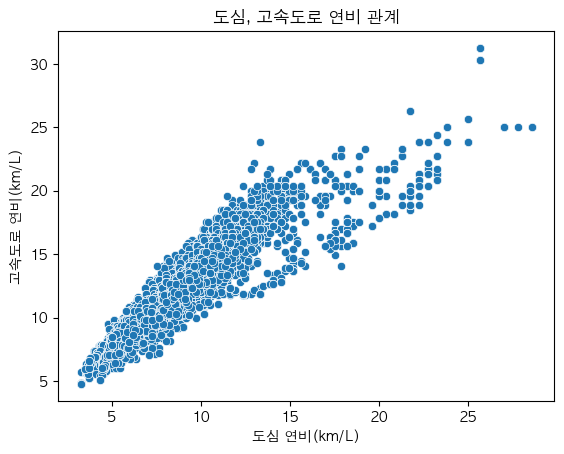

In [4]:
sns.scatterplot(
    data = mobility_df,
    x = 'CITY (km/L)',
    y = 'HWY (km/L)'
    )

plt.title('도심, 고속도로 연비 관계')
plt.xlabel('도심 연비(km/L)')
plt.ylabel('고속도로 연비(km/L)')
plt.show()

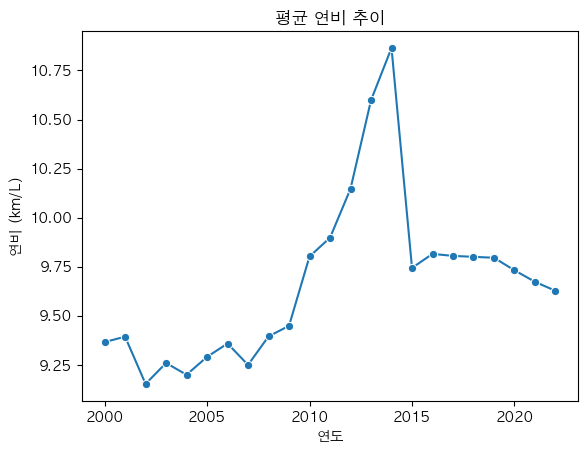

In [5]:
year_summary = mobility_df.groupby('YEAR'
                                   ).agg({'COMB (km/L)' : 'mean',
                                          'EMISSIONS' : 'mean'}).reset_index()

sns.lineplot(
    data = year_summary,
    x = 'YEAR',
    y = 'COMB (km/L)',
    marker = 'o'
    )

plt.title('평균 연비 추이')
plt.xlabel('연도')
plt.ylabel('연비 (km/L)')
plt.show()


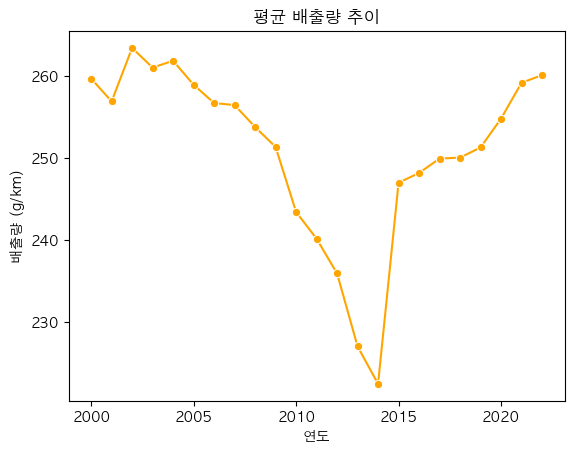

In [6]:
sns.lineplot(
    data = year_summary,
    x = 'YEAR',
    y = 'EMISSIONS',
    color = 'orange',
    marker = 'o'
    )

plt.title('평균 배출량 추이')
plt.xlabel('연도')
plt.ylabel('배출량 (g/km)')
plt.show()

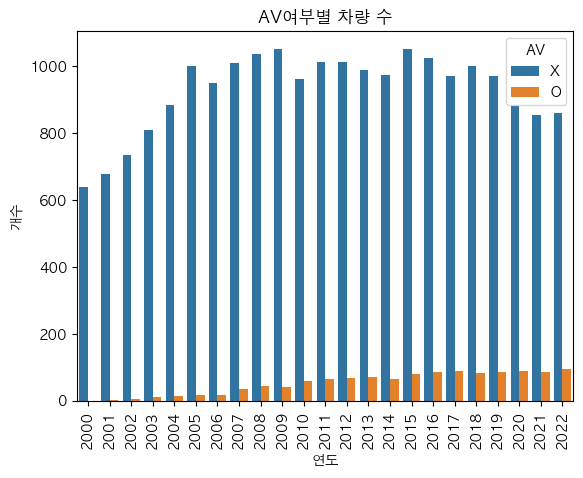

In [7]:
sns.countplot(
    data = mobility_df,
    x = 'YEAR',
    hue = 'IS AV'
    )

plt.title('AV여부별 차량 수')
plt.xticks(rotation = 90)
plt.xlabel('연도')
plt.ylabel('개수', rotation = 90)
plt.legend(['X', 'O'], title = 'AV')
plt.yticks(rotation = 0)
plt.show()

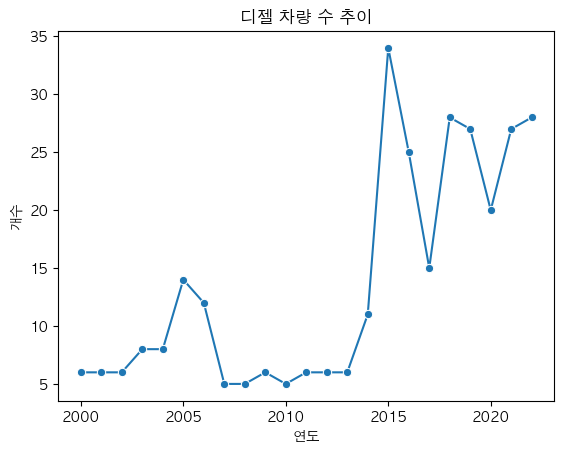

In [8]:
diesel_cnt = mobility_df[mobility_df['FUEL'] == 'Diesel'
                         ].groupby('YEAR').size().reset_index(name = 'COUNT')
# print(diesel_cnt)

sns.lineplot(
    data = diesel_cnt,
    x = 'YEAR',
    y = 'COUNT',
    marker = 'o'
    )

plt.title('디젤 차량 수 추이')
plt.xlabel('연도')
plt.ylabel('개수')
plt.show()

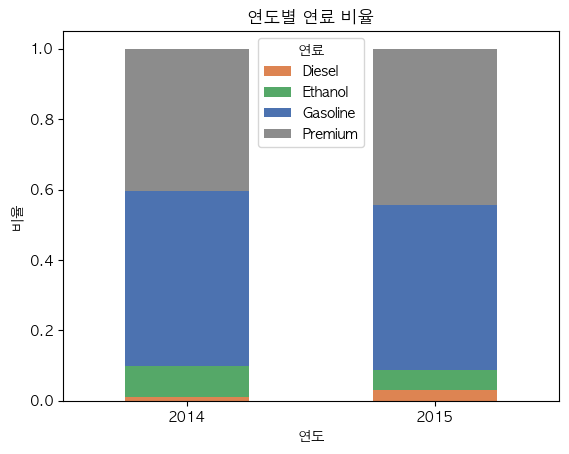

In [9]:
fuel_cnt = mobility_df[mobility_df['YEAR'].isin([2014, 2015])
                       ].groupby('YEAR')['FUEL'].value_counts().unstack()
# print(fuel_cnt)

fuel_df = fuel_cnt.div(fuel_cnt.sum(axis=1), axis=0)

# stacked bar 그리기
fuel_df.plot(
    kind = 'bar',
    stacked = True,
    color = palette_ip
)

plt.title('연도별 연료 비율')
plt.ylabel('비율')
plt.xlabel('연도')
plt.xticks(rotation = 0)
plt.legend(title='연료', loc = 'upper center')
plt.show()

In [10]:
red_df = mobility_df[mobility_df['DIESEL GATE'] == 'RED']

sns.lineplot(
    data = red_df,
    x = 'YEAR',
    y = 'EMISSIONS',
    hue = 'CLASS GROUP',
    palette = palette_ip,
    marker = 'o'
    )

plt.title('차종별 배출량 추이 (Red Group)')
plt.xlabel('연도')
plt.ylabel('배출량 (g/km)')
plt.legend(title = '차종')
plt.ylim(150, 450)
plt.show()

ValueError: The palette dictionary is missing keys: {'WAGON'}

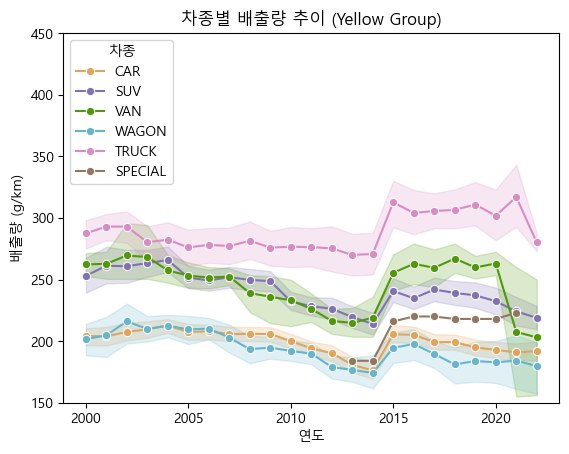

In [ ]:
yellow_df = mobility_df[mobility_df['DIESEL GATE'] == 'YELLOW']

sns.lineplot(
    data = yellow_df,
    x = 'YEAR',
    y = 'EMISSIONS',
    hue = 'CLASS GROUP',
    palette = palette_ip,
    marker = 'o'
    )

plt.title('차종별 배출량 추이 (Yellow Group)')
plt.xlabel('연도')
plt.ylabel('배출량 (g/km)')
plt.legend(title = '차종', loc = 'upper left')
plt.ylim(150, 450)
plt.show()

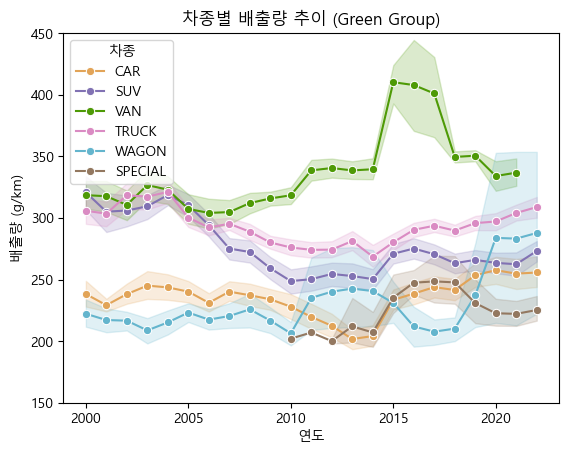

In [ ]:
green_df = mobility_df[mobility_df['DIESEL GATE'] == 'GREEN']

sns.lineplot(
    data = green_df,
    x = 'YEAR',
    y = 'EMISSIONS',
    hue = 'CLASS GROUP',
    palette = palette_ip,
    marker = 'o'
    )

plt.title('차종별 배출량 추이 (Green Group)')
plt.xlabel('연도')
plt.ylabel('배출량 (g/km)')
plt.legend(title = '차종', loc = 'upper left')
plt.ylim(150, 450)
plt.show()

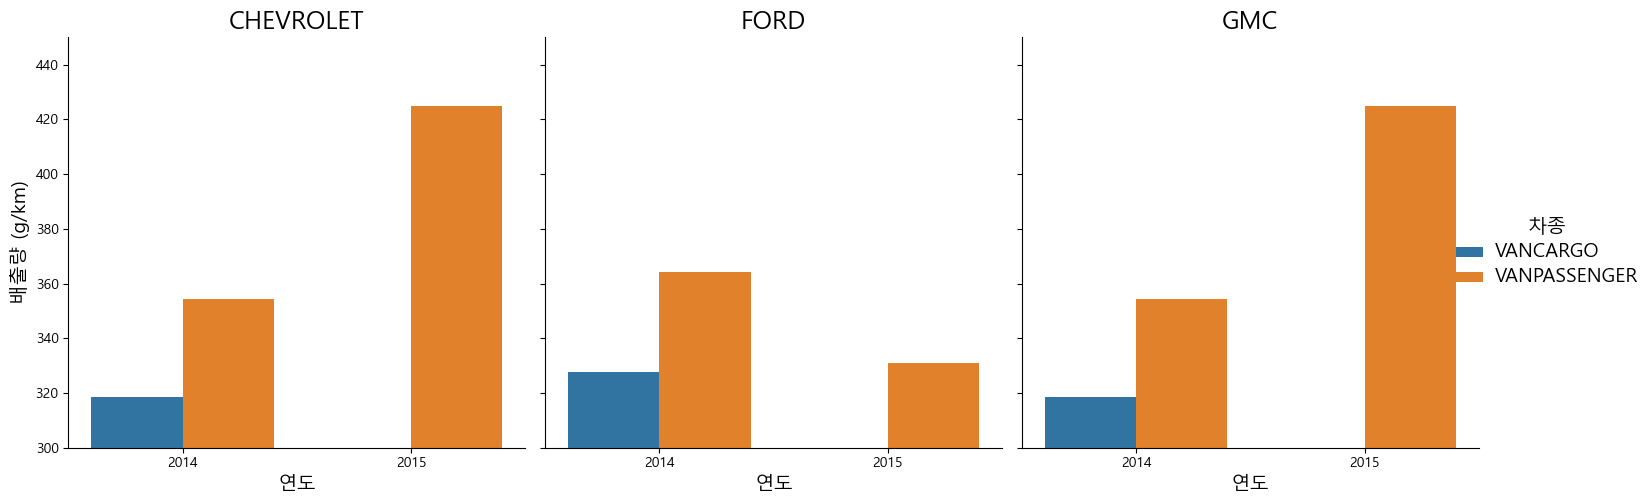

In [ ]:
green_van_1415 = mobility_df[(mobility_df['DIESEL GATE'] == 'GREEN') &
                             (mobility_df['CLASS GROUP'] == 'VAN') &
                             (mobility_df['YEAR'].isin([2014,2015]))
                             ].groupby(['YEAR', 'MAKE', 'VEHICLE CLASS']
                                       )['EMISSIONS'].mean().reset_index()

green_van = sns.catplot(
    data=green_van_1415,
    x='YEAR',
    y='EMISSIONS',
    hue='VEHICLE CLASS',
    col='MAKE',
    kind='bar'
)
green_van_legend = green_van._legend
green_van.set_xlabels('연도', fontsize = 14)
green_van.set_ylabels('배출량 (g/km)', fontsize = 14)
green_van_legend.set_title('차종')
green_van_legend.get_title().set_fontsize(14)
for green_van, title in zip(green_van.axes[0], ['CHEVROLET', 'FORD', 'GMC']):
    green_van.set_title(title, fontsize = 18)
for text in green_van_legend.get_texts():
    text.set_fontsize(14)
plt.ylim(300, 450)
plt.show()

MAKE  CHEVROLET      FORD       GMC
YEAR                               
2014   0.404255  0.191489  0.404255
2015   0.421053  0.157895  0.421053


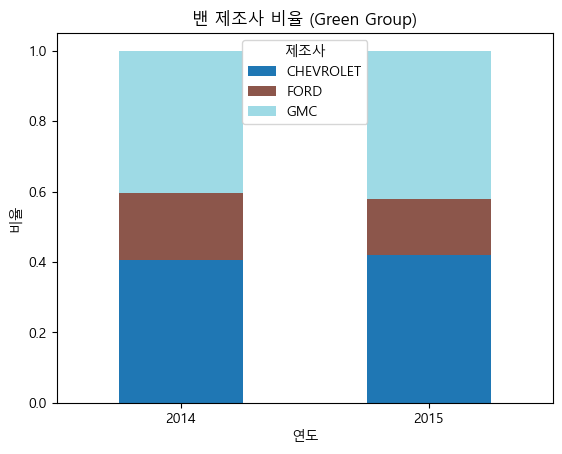

In [ ]:
green_van_cnt = mobility_df[(mobility_df['DIESEL GATE'] == 'GREEN') &
                            (mobility_df['CLASS GROUP'] == 'VAN') &
                            (mobility_df['YEAR'].isin([2014,2015]))
                            ].groupby(['YEAR', 'MAKE'])['CLASS GROUP'].count().unstack()

green_van_ratio = green_van_cnt.div(green_van_cnt.sum(axis=1), axis = 0)
print(green_van_ratio)

green_van_ratio.plot(
    kind = 'bar',
    stacked = True,
    colormap = 'tab20'
)
plt.xlabel('연도')
plt.ylabel('비율')
plt.title('밴 제조사 비율 (Green Group)')
plt.legend(title='제조사', loc = 'upper center')
plt.xticks(rotation = 0)
plt.show()

ENGINE GROUP       4~5       6~7       5~6
YEAR                                      
2014          0.157895  0.210526  0.631579
2015          0.250000  0.750000       NaN


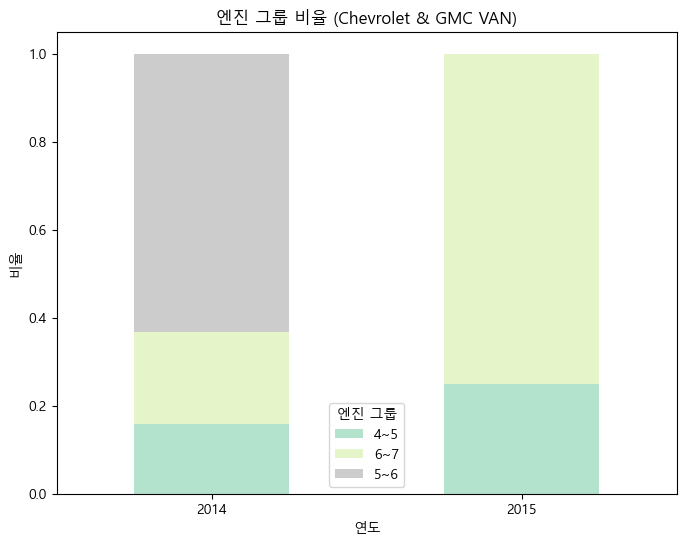

In [ ]:
diesel_gate = mobility_df[
    (mobility_df['CLASS GROUP'] == 'VAN') &
    (mobility_df['YEAR'].isin([2014, 2015])) &
    (mobility_df['MAKE'].isin(['CHEVROLET', 'GMC']))
    ].groupby(['YEAR', 'ENGINE GROUP']).size().unstack()

diesel_gate_ratio = diesel_gate.div(diesel_gate.sum(axis=1), axis=0)
diesel_gate_ratio = diesel_gate_ratio[['4~5', '6~7', '5~6']]
print(diesel_gate_ratio)

diesel_gate_ratio.plot(
    kind = 'bar',
    stacked = True,
    figsize = (8,6),
    colormap = 'Pastel2'
)

plt.xlabel('연도')
plt.ylabel('비율')
plt.title('엔진 그룹 비율 (Chevrolet & GMC VAN)')
plt.legend(title = '엔진 그룹')
plt.xticks(rotation = 0)
plt.show()

#### 엔진 그룹 별 연비

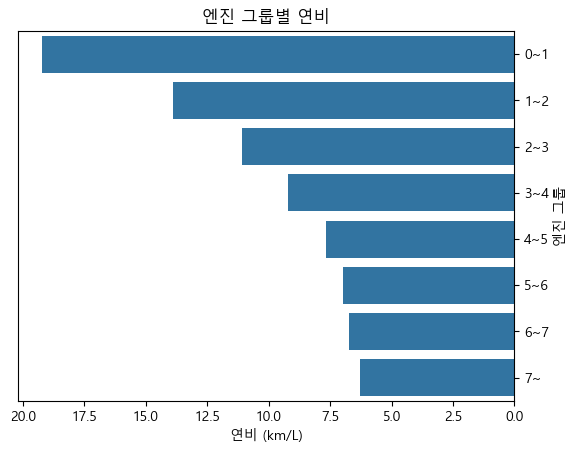

In [ ]:
engine_group_mean = mobility_df.groupby('ENGINE GROUP'
                                        ).agg({'COMB (km/L)' : 'mean',
                                               'EMISSIONS' : 'mean'})

engine_graph = sns.barplot(
    data = engine_group_mean,
    x = 'COMB (km/L)',
    y = 'ENGINE GROUP',
    orient = 'h'
    )

engine_graph.invert_xaxis()
engine_graph.yaxis.set_label_position('right')   # 레이블 위치
engine_graph.yaxis.tick_right()                  # 눈금도 오른쪽으로
plt.title('엔진 그룹별 연비')
plt.xlabel('연비 (km/L)')
plt.ylabel('엔진 그룹')
plt.show()

#### 엔진 그룹 별 배출량

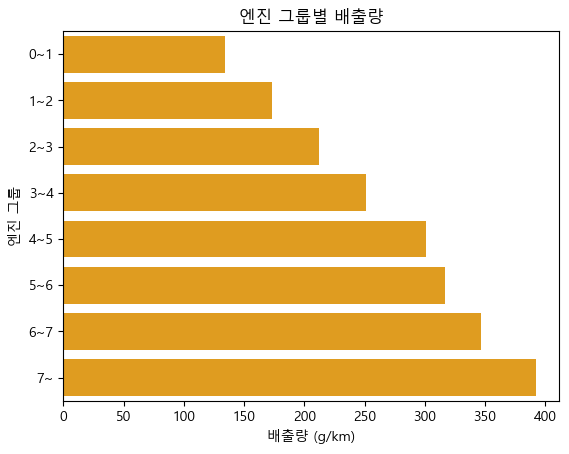

In [ ]:
sns.barplot(
    data = engine_group_mean,
    x = 'EMISSIONS',
    y = 'ENGINE GROUP',
    color = 'orange',
    orient = 'h'
    )

plt.title('엔진 그룹별 배출량')
plt.xlabel('배출량 (g/km)')
plt.ylabel('엔진 그룹')
plt.show()

#### 실린더 별 연비

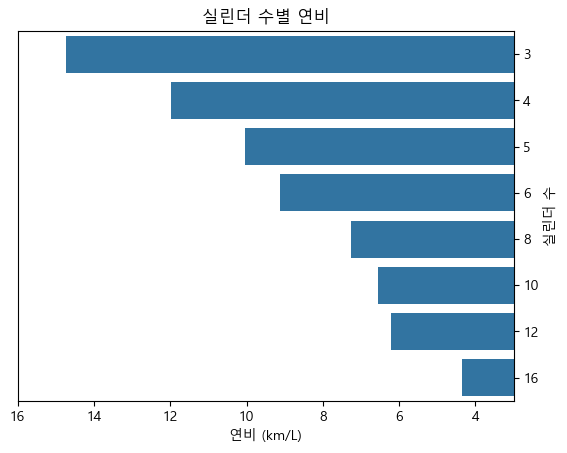

In [ ]:
cylinder_mean = mobility_df[mobility_df['CYLINDERS'] > 2
                            ].groupby('CYLINDERS'
                                      ).agg({'COMB (km/L)' : 'mean',
                                             'EMISSIONS' : 'mean'}).reset_index()

sylinder_graph = sns.barplot(
    data = cylinder_mean,
    x = 'COMB (km/L)',
    y = 'CYLINDERS',
    orient = 'h'
    )

plt.xlim(3, 16)
sylinder_graph.invert_xaxis()
sylinder_graph.yaxis.set_label_position('right')   # 레이블 위치
sylinder_graph.yaxis.tick_right()                  # 눈금도 오른쪽으로
plt.xticks(rotation = 0)
plt.title('실린더 수별 연비')
plt.xlabel('연비 (km/L)')
plt.ylabel('실린더 수', rotation = 90)
plt.show()

#### 실린더 별 배출량

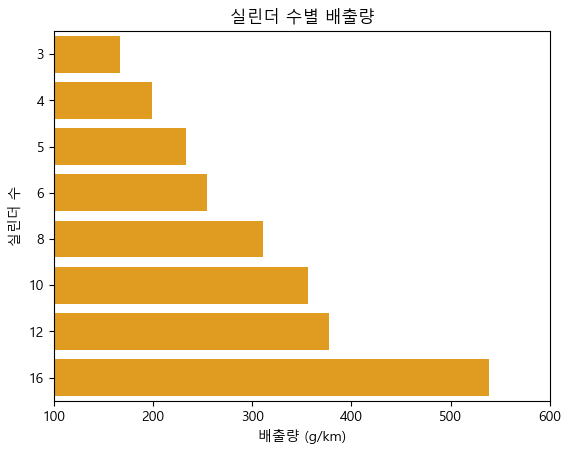

In [ ]:
sns.barplot(
    data = cylinder_mean,
    x = 'EMISSIONS',
    y = 'CYLINDERS',
    color = 'orange',
    orient = 'h'
    )

plt.xlim(100, 600)
plt.title('실린더 수별 배출량')
plt.xlabel('배출량 (g/km)')
plt.ylabel('실린더 수')
plt.show()

#### 기어별 연비

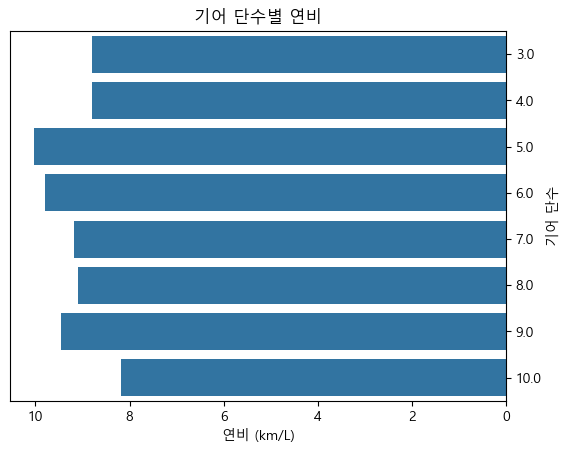

In [ ]:
gear_mean = mobility_df[mobility_df['GEAR'] > 1
                        ].groupby('GEAR'
                                  ).agg({'COMB (km/L)' : 'mean',
                                         'EMISSIONS' : 'mean'}).reset_index()

gear_ax = sns.barplot(
    data = gear_mean,
    x = 'COMB (km/L)',
    y = 'GEAR',
    orient = 'h'
    )

gear_ax.invert_xaxis()
gear_ax.yaxis.set_label_position('right')   # 레이블 위치
gear_ax.yaxis.tick_right()
plt.title('기어 단수별 연비')
plt.xlabel('연비 (km/L)')
plt.ylabel('기어 단수')
plt.show()

#### 기어별 배출량

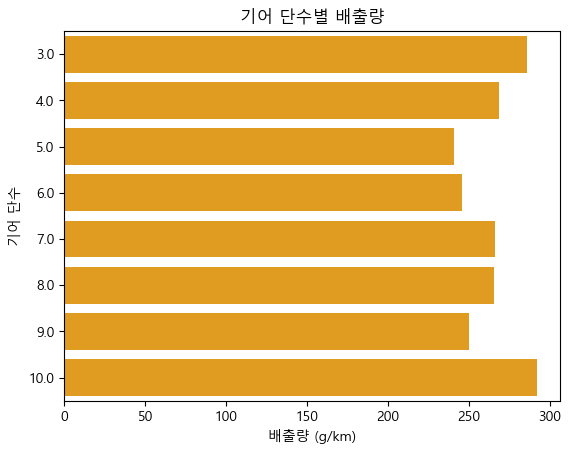

In [ ]:
sns.barplot(
    data = gear_mean,
    x = 'EMISSIONS',
    y = 'GEAR',
    color = 'orange',
    orient = 'h'
    )

plt.title('기어 단수별 배출량')
plt.xlabel('배출량 (g/km)')
plt.ylabel('기어 단수')
plt.show()

#### 변속기별 연비

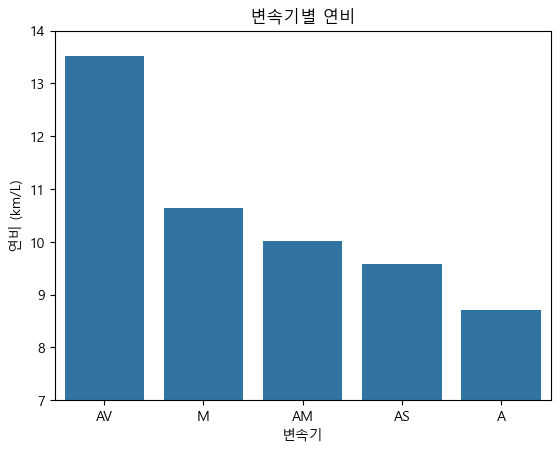

In [ ]:
prefix_mean = mobility_df.groupby('PREFIX'
                                  ).agg({'COMB (km/L)' : 'mean',
                                         'EMISSIONS' : 'mean'}).reset_index()

order = prefix_mean.sort_values('COMB (km/L)', ascending=False)['PREFIX']

sns.barplot(
    data = prefix_mean,
    x = 'PREFIX',
    y = 'COMB (km/L)',
    order = order
    )

plt.title('변속기별 연비')
plt.xlabel('변속기')
plt.ylabel('연비 (km/L)')
plt.ylim(7, 14)
plt.show()

#### 변속기 별 배출량

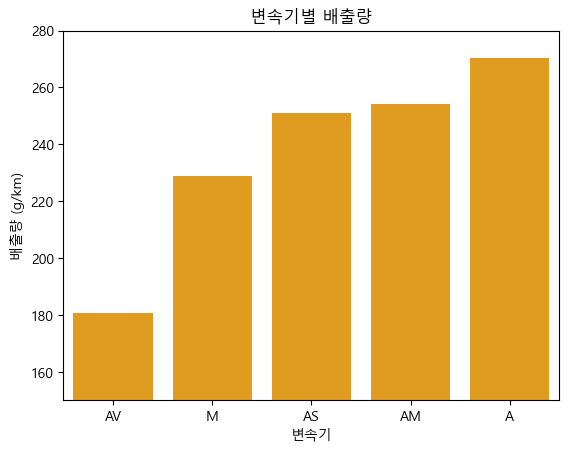

In [ ]:
order = prefix_mean.sort_values('EMISSIONS', ascending=True)['PREFIX']

sns.barplot(
    data = prefix_mean,
    x = 'PREFIX',
    y = 'EMISSIONS',
    color = 'orange',
    order = order
    )

plt.title('변속기별 배출량')
plt.xlabel('변속기')
plt.ylabel('배출량 (g/km)')
plt.ylim(150, 280)
plt.show()

#### 연료별 평균 연비 막대 그래프

          FUEL  COMB (km/L)   EMISSIONS
0       Diesel    12.391879  230.305732
1      Ethanol     6.163427  270.578898
2     Gasoline    10.270283  240.280748
3  Natural Gas     6.215455  312.848485
4      Premium     9.297919  260.574818


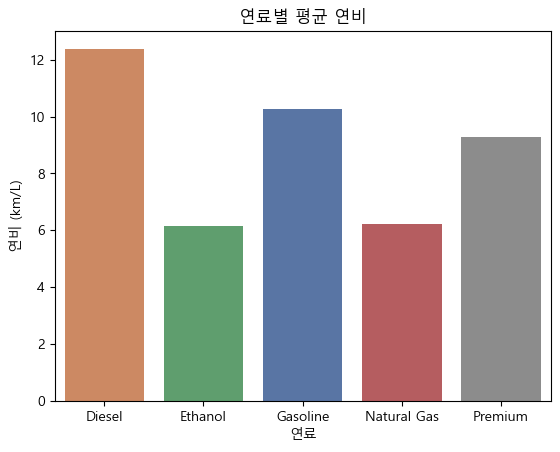

In [ ]:
emission_comb_by_fuel = mobility_df.groupby('FUEL'
                                            ).agg({'COMB (km/L)': 'mean',
                                                   'EMISSIONS' : 'mean'}).reset_index()
# print(emission_comb_by_fuel)

sns.barplot(
    data = emission_comb_by_fuel,
    x = 'FUEL',
    y = 'COMB (km/L)',
    hue = 'FUEL',
    palette = palette_ip
    )

plt.title('연료별 평균 연비')
plt.xlabel('연료')
plt.ylabel('연비 (km/L)')
plt.show()

#### 연료별 평균 배출량 막대 그래프

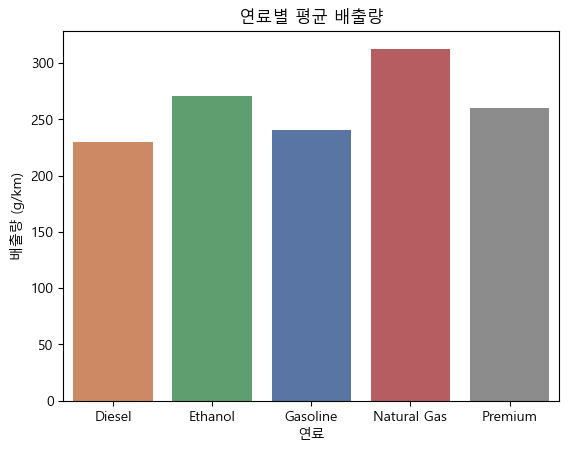

In [ ]:
sns.barplot(
    data = emission_comb_by_fuel,
    x = 'FUEL',
    y = 'EMISSIONS',
    hue = 'FUEL',
    palette = palette_ip
    )

plt.title('연료별 평균 배출량')
plt.xlabel('연료')
plt.ylabel('배출량 (g/km)')
plt.show()

#### 연료별 연비 추이

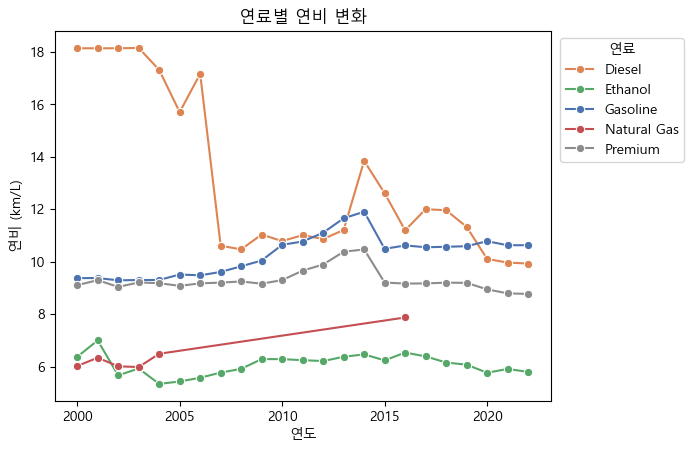

In [ ]:
annual_emission_comb_by_fuel = mobility_df.groupby(['YEAR', 'FUEL']
                                                   ).agg({'COMB (km/L)': 'mean',
                                                          'EMISSIONS' : 'mean'}).reset_index()

sns.lineplot(
    data = annual_emission_comb_by_fuel,
    x = 'YEAR',
    y = 'COMB (km/L)',
    hue = 'FUEL',
    palette = palette_ip,
    marker = 'o'
    )

plt.title('연료별 연비 변화')
plt.xlabel('연도')
plt.ylabel('연비 (km/L)')
plt.legend(title = '연료', loc = 'upper left', bbox_to_anchor = (1.005, 1))
plt.show()

#### 연료별 배출량 추이

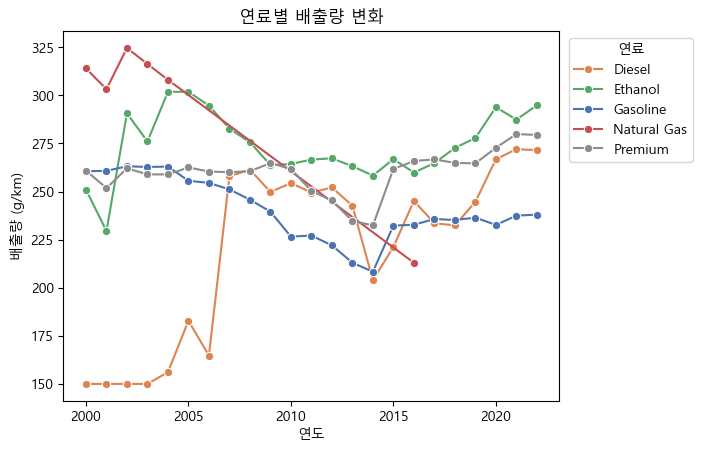

In [ ]:
sns.lineplot(
    data = annual_emission_comb_by_fuel,
     x = 'YEAR',
     y = 'EMISSIONS',
     hue = 'FUEL',
     palette = palette_ip,
     marker = 'o'
     )

plt.title('연료별 배출량 변화')
plt.xlabel('연도')
plt.ylabel('배출량 (g/km)')
plt.legend(title = '연료', loc = 'upper left', bbox_to_anchor = (1.005, 1))
plt.show()

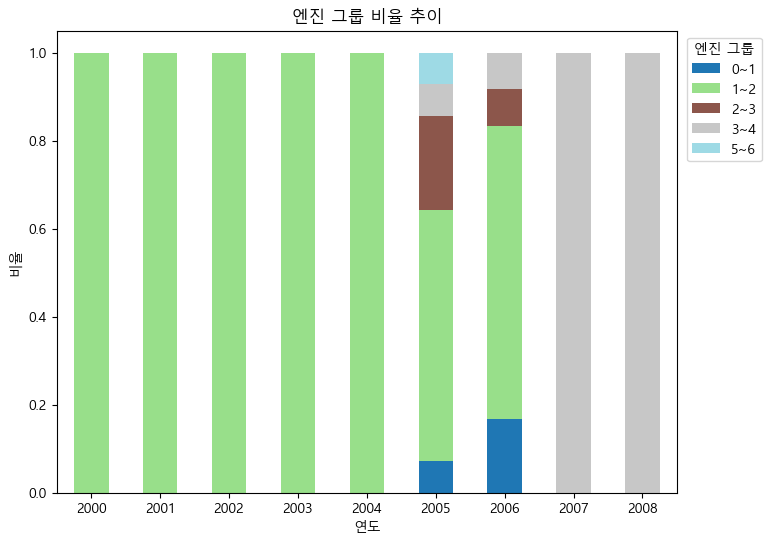

In [ ]:
diesel_df = mobility_df[
    (mobility_df['FUEL'] == 'Diesel') &
    (mobility_df['YEAR'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]))
    ].groupby(['YEAR', 'ENGINE GROUP']).size().unstack(fill_value=0)

# print(diesel_df)

diesel_df_ratio = diesel_df.div(diesel_df.sum(axis=1), axis=0)
# print(diesel_df_ratio)

diesel_df_ratio.plot(
    kind = 'bar',
    stacked = True,
    figsize = (8,6),
    colormap = 'tab20'
)

plt.xlabel('연도')
plt.ylabel('비율')
plt.title('엔진 그룹 비율 추이')
plt.legend(loc = 'upper left', title = '엔진 그룹', bbox_to_anchor = (1.005,1))
plt.xticks(rotation = 0)
plt.show()

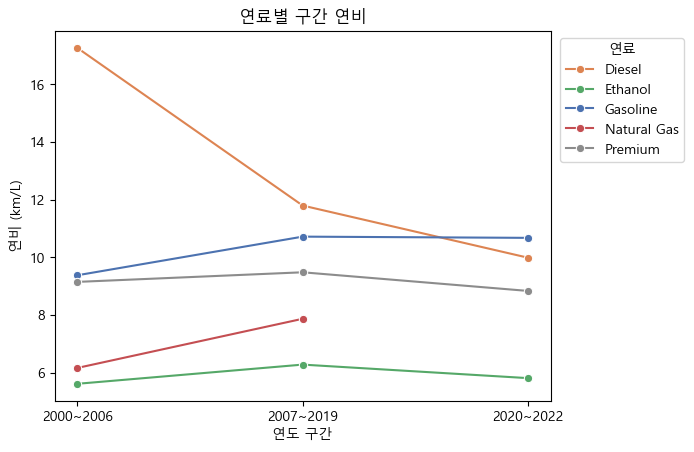

In [ ]:
emission_comb_by_fuel_0006 = mobility_df[mobility_df['YEAR'] < 2007
                                         ].groupby('FUEL').agg(
                                             {'COMB (km/L)': 'mean',
                                              'EMISSIONS' : 'mean'}).reset_index()

emission_comb_by_fuel_0719 = mobility_df[(mobility_df['YEAR'] > 2007) &
                                         (mobility_df['YEAR'] <2020)
                                         ].groupby('FUEL').agg(
                                             {'COMB (km/L)': 'mean',
                                              'EMISSIONS' : 'mean'}).reset_index()

emission_comb_by_fuel_2022 = mobility_df[mobility_df['YEAR'] > 2019
                                         ].groupby('FUEL').agg(
                                             {'COMB (km/L)': 'mean', 'EMISSIONS' : 'mean'}).reset_index()

# print(emission_comb_by_fuel_0006)

emission_comb_by_fuel_0006['PERIOD'] = '2000~2006'
emission_comb_by_fuel_0719['PERIOD'] = '2007~2019'
emission_comb_by_fuel_2022['PERIOD'] = '2020~2022'

# print(emission_comb_by_fuel_0006)

# 하나로 합치기
emission_comb_concat = pd.concat([
    emission_comb_by_fuel_0006,
    emission_comb_by_fuel_0719,
    emission_comb_by_fuel_2022
])

# print(emission_comb_concat)

# 연비 꺾은선 그래프
sns.lineplot(
    data = emission_comb_concat,
    x =  'PERIOD',
    y = 'COMB (km/L)',
    hue = 'FUEL',
    marker = 'o',
    palette = palette_ip
)

plt.xlabel('연도 구간')
plt.ylabel('연비 (km/L)')
plt.title('연료별 구간 연비')
plt.legend(title = '연료', loc = 'upper left', bbox_to_anchor = (1.005, 1))
plt.show()

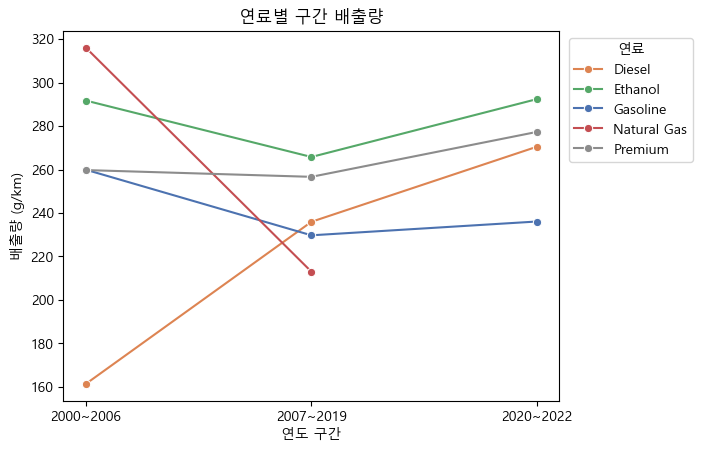

In [ ]:
# 배출량 꺾은선 그래프
sns.lineplot(
    data = emission_comb_concat,
    x = 'PERIOD',
    y = 'EMISSIONS',
    hue = 'FUEL',
    marker = 'o',
    palette = palette_ip
)

plt.xlabel('연도 구간')
plt.ylabel('배출량 (g/km)')
plt.title('연료별 구간 배출량')
plt.legend(title = '연료', loc = 'upper left', bbox_to_anchor = (1.005, 1))
plt.show()

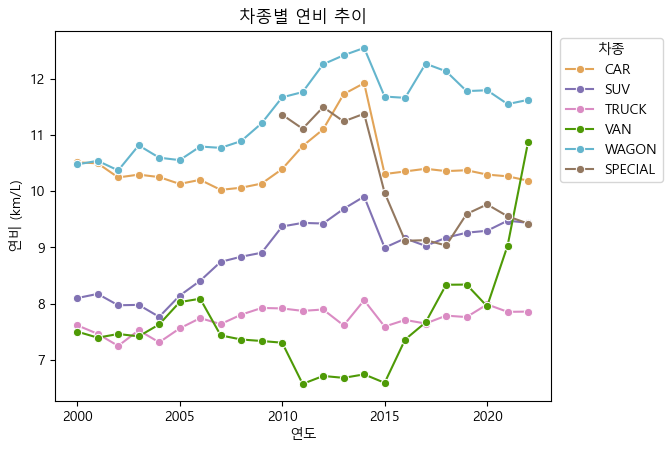

In [ ]:
year_class_mean = mobility_df.groupby(['YEAR', 'CLASS GROUP']
                                      ).agg({'EMISSIONS' : 'mean',
                                             'COMB (km/L)' : 'mean'}
                                             ).reset_index()


sns.lineplot(
    data = year_class_mean,
    x = 'YEAR',
    y = 'COMB (km/L)',
    hue = 'CLASS GROUP',
    palette = palette_ip,
    marker = 'o'
    )

plt.title('차종별 연비 추이')
plt.xlabel('연도')
plt.ylabel('연비 (km/L)')
plt.legend(title = '차종', loc = 'upper left', bbox_to_anchor = (1.005, 1))
plt.show()

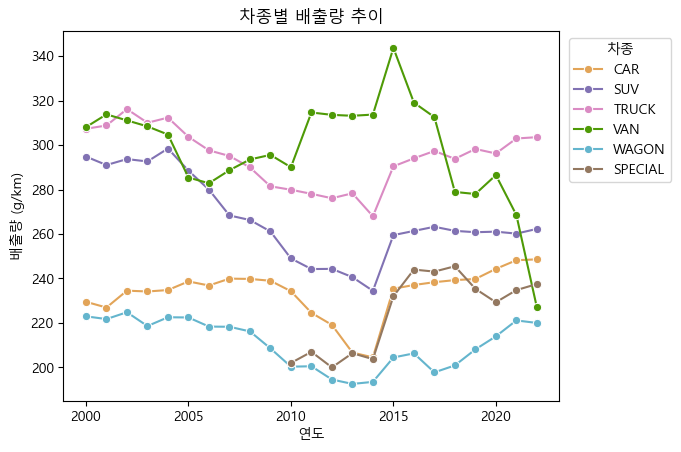

In [ ]:
sns.lineplot(
    data = year_class_mean,
    x = 'YEAR',
    y = 'EMISSIONS',
    hue = 'CLASS GROUP',
    palette = palette_ip,
    marker = 'o'
    )

plt.title('차종별 배출량 추이')
plt.xlabel('연도')
plt.ylabel('배출량 (g/km)')
plt.legend(title = '차종', loc = 'upper left', bbox_to_anchor = (1.005, 1))
plt.show()


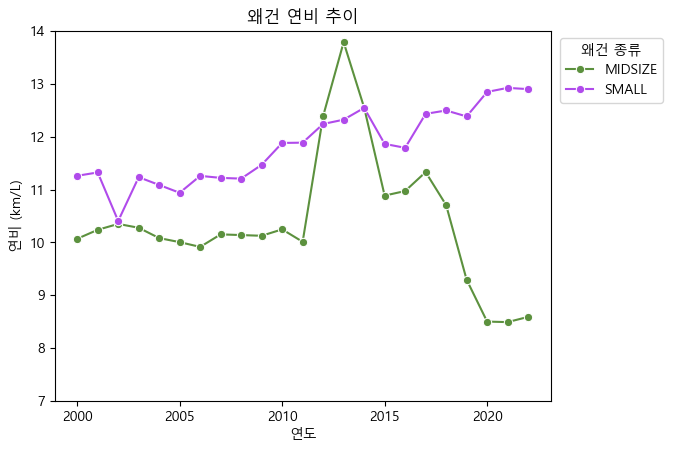

<Figure size 800x600 with 0 Axes>

In [ ]:
# WAGON 그룹 데이터
wagon_df = mobility_df[mobility_df['CLASS GROUP'] == 'WAGON'
                       ].groupby(['YEAR', 'VEHICLE CLASS']
                                  ).agg({'COMB (km/L)' : 'mean',
                                         'EMISSIONS' : 'mean'}).reset_index()


sns.lineplot(
    data = wagon_df,
    x = 'YEAR',
    y = 'COMB (km/L)',
    hue = 'VEHICLE CLASS',
    palette = palette_ip,
    marker = 'o'
)

plt.title('왜건 연비 추이')
plt.ylabel('연비 (km/L)')
plt.xlabel('연도')
handles, labels = plt.gca().get_legend_handles_labels()   #.gca : get current axes 현재 형태,
new_label = ['MIDSIZE', 'SMALL']                           # handles : 범례의 예시 모양
plt.legend(                                                 # labels : 범례의 이름
    handles,
    new_label,
    title = '왜건 종류',
    bbox_to_anchor = (1.005,1),
    loc = 'upper left')
plt.ylim(7,14)
plt.figure(figsize = (8,6))
plt.show()

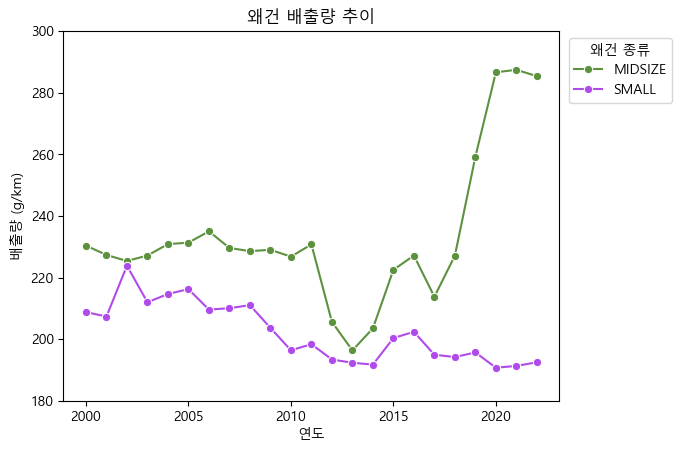

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.lineplot(
    data = wagon_df,
    x = 'YEAR',
    y = 'EMISSIONS',
    hue = 'VEHICLE CLASS',
    palette = palette_ip,
    marker = 'o'
)

plt.title('왜건 배출량 추이')
plt.ylabel('배출량 (g/km)')
plt.xlabel('연도')
plt.ylim(180,300)
plt.legend(
    handles,
    new_label,
    title = '왜건 종류',
    bbox_to_anchor = (1.005,1),
    loc = 'upper left'
    )

plt.figure(figsize = (8,6))
plt.show()